In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sqlite

In [2]:
# reading in excel table 1(immigrant stock) while moving the the header 15 rows up and skipping rows 16-39

immigrantstock=pd.read_excel('../data/UN_MigrantStockTotal_2019.xlsx',
             sheet_name= 'Table 1',
              header=15, skiprows=[i for i in range (16,39)])

In [3]:
immigrantstock

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2010.1,2015.1,2019.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2019.2
0,24,Burundi,NaN,108,B R,333110,254853,125628,172874,235259,...,115823.0,142790,158163.0,169843,130688,64534,88069,119436,147020.0,162855
1,25,Comoros,NaN,174,B,14079,13939,13799,13209,12618,...,6060.0,6071,6047.0,7362,7325,7288,6923,6558,6484.0,6457
2,26,Djibouti,NaN,262,B R,122221,99774,100507,92091,101575,...,53295.0,59081,60654.0,57979,47298,47587,40776,48280,53270.0,54687
3,27,Eritrea,NaN,232,I,11848,12400,12952,14314,15676,...,8603.0,8833,8922.0,5620,5858,6096,6585,7073,7108.0,7179
4,28,Ethiopia,NaN,231,B R,1155390,806904,611384,514242,568748,...,298069.0,591409,637963.0,548106,382787,289165,244517,270679,570233.0,615120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,279,Bermuda,NaN,60,B,15683,16676,17668,18276,18884,...,9202.0,9336,9439.0,8126,8632,9137,9410,9682,9790.0,9897
256,280,Canada,NaN,124,B,4333318,4864778,5511914,6078985,6761226,...,3236539.0,3533164,3786190.0,2223666,2508673,2852779,3163147,3524687,3895493.0,4174467
257,281,Greenland,NaN,304,B,9282,7121,6601,6556,6091,...,4119.0,3812,3742.0,2810,2246,1985,2095,1972,1985.0,1948
258,282,Saint Pierre and Miquelon,NaN,666,B,1099,1320,1458,1147,1017,...,531.0,516,519.0,539,638,702,550,486,470.0,471


In [4]:
# dropping the columns highlighted in blue in the excel sprdsheet(ones i dont want)
immigrantstock=immigrantstock.loc[~(immigrantstock['Unnamed: 0']==44)& ~(immigrantstock['Unnamed: 0']==54) & ~(immigrantstock['Unnamed: 0']==60)
                   & ~(immigrantstock['Unnamed: 0']==78) & ~(immigrantstock['Unnamed: 0']==79) & ~(immigrantstock['Unnamed: 0']==87)
                   & ~(immigrantstock['Unnamed: 0']==106) & ~(immigrantstock['Unnamed: 0']==107) & ~(immigrantstock['Unnamed: 0']==113)
                   & ~(immigrantstock['Unnamed: 0']==123) & ~(immigrantstock['Unnamed: 0']==124) & ~(immigrantstock['Unnamed: 0']==132)
                   & ~(immigrantstock['Unnamed: 0']==144) & ~(immigrantstock['Unnamed: 0']==145) & ~(immigrantstock['Unnamed: 0']==172)
                   & ~(immigrantstock['Unnamed: 0']==181) & ~(immigrantstock['Unnamed: 0']==196) & ~(immigrantstock['Unnamed: 0']==197)
                   & ~(immigrantstock['Unnamed: 0']==200) & ~(immigrantstock['Unnamed: 0']==206) & ~(immigrantstock['Unnamed: 0']==214)
                   & ~(immigrantstock['Unnamed: 0']==224) & ~(immigrantstock['Unnamed: 0']==225) & ~(immigrantstock['Unnamed: 0']==226)
                   & ~(immigrantstock['Unnamed: 0']==237) & ~(immigrantstock['Unnamed: 0']==251) & ~(immigrantstock['Unnamed: 0']==268)
                   & ~(immigrantstock['Unnamed: 0']==278)]

In [5]:
# renaming the columns but toward 2010 i had to put the column in '' because its not a str. so you'll see the first few
#columns in green and then it'll be all in ''.

img_stk_gndr=immigrantstock.rename(columns = {'Unnamed: 0':'Sort order','Unnamed: 1' : 'Major country, area of destination',
                                          'Unnamed: 2' : 'Notes','Unnamed: 3' : 'Code','Unnamed: 4' : 'Type of data',
                                          1990 : 'M/F 1990',1995 : 'M/F 1995',2000 : 'M/F 2000',
                                         2005:'M/F 2005',2010 : 'M/F 2010',2015 : 'M/F img_stk 2015',2019: 'M/F img_stk 2019',
                                          1990.1 : 'M 1990',1995.1 : 'M 1995',2000.1 : 'M 2000',
                                         2005.1:'M 2005','2010.1' : 'M 2010','2015.1' : 'M img_stk 2015','2019.1': 'M img_stk 2019',
                                         '1990.2' : 'F 1990','1995.2' : 'F 1995','2000.2' : 'F 2000',
                                         '2005.2':'F 2005','2010.2' : 'F 2010','2015.2' : 'F img_stk 2015','2019.2': 'F img_stk 2019'})

In [6]:
img_stk_gndr

,Sort order,"Major country, area of destination",Notes,Code,Type of data,M/F 1990,M/F 1995,M/F 2000,M/F 2005,M/F 2010,...,M 2010,M img_stk 2015,M img_stk 2019,F 1990,F 1995,F 2000,F 2005,F 2010,F img_stk 2015,F img_stk 2019
0,24,Burundi,NaN,108,B R,333110,254853,125628,172874,235259,...,115823.0,142790,158163.0,169843,130688,64534,88069,119436,147020.0,162855
1,25,Comoros,NaN,174,B,14079,13939,13799,13209,12618,...,6060.0,6071,6047.0,7362,7325,7288,6923,6558,6484.0,6457
2,26,Djibouti,NaN,262,B R,122221,99774,100507,92091,101575,...,53295.0,59081,60654.0,57979,47298,47587,40776,48280,53270.0,54687
3,27,Eritrea,NaN,232,I,11848,12400,12952,14314,15676,...,8603.0,8833,8922.0,5620,5858,6096,6585,7073,7108.0,7179
4,28,Ethiopia,NaN,231,B R,1155390,806904,611384,514242,568748,...,298069.0,591409,637963.0,548106,382787,289165,244517,270679,570233.0,615120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,279,Bermuda,NaN,60,B,15683,16676,17668,18276,18884,...,9202.0,9336,9439.0,8126,8632,9137,9410,9682,9790.0,9897
256,280,Canada,NaN,124,B,4333318,4864778,5511914,6078985,6761226,...,3236539.0,3533164,3786190.0,2223666,2508673,2852779,3163147,3524687,3895493.0,4174467
257,281,Greenland,NaN,304,B,9282,7121,6601,6556,6091,...,4119.0,3812,3742.0,2810,2246,1985,2095,1972,1985.0,1948
258,282,Saint Pierre and Miquelon,NaN,666,B,1099,1320,1458,1147,1017,...,531.0,516,519.0,539,638,702,550,486,470.0,471


In [7]:
#keeping what I need from the above table to an new table named img_stk_2yrs (only keeping 2yrs of data)

img_stk_2yrs=img_stk_gndr[['Sort order','Major country, area of destination','M/F img_stk 2015', 'M/F img_stk 2019',
                           'M img_stk 2015', 'M img_stk 2019','F img_stk 2015', 'F img_stk 2019' ]]

In [8]:
img_stk_2yrs

,Sort order,"Major country, area of destination",M/F img_stk 2015,M/F img_stk 2019,M img_stk 2015,M img_stk 2019,F img_stk 2015,F img_stk 2019
0,24,Burundi,289810.0,321018.0,142790,158163.0,147020.0,162855
1,25,Comoros,12555.0,12504.0,6071,6047.0,6484.0,6457
2,26,Djibouti,112351.0,115341.0,59081,60654.0,53270.0,54687
3,27,Eritrea,15941.0,16101.0,8833,8922.0,7108.0,7179
4,28,Ethiopia,1161642.0,1253083.0,591409,637963.0,570233.0,615120
...,...,...,...,...,...,...,...,...
255,279,Bermuda,19126.0,19336.0,9336,9439.0,9790.0,9897
256,280,Canada,7428657.0,7960657.0,3533164,3786190.0,3895493.0,4174467
257,281,Greenland,5797.0,5690.0,3812,3742.0,1985.0,1948
258,282,Saint Pierre and Miquelon,986.0,990.0,516,519.0,470.0,471


In [9]:
# reading in excel Table 2 (country population table)while moving the the header 15 rows up and skipping rows 16-39
country_pop=pd.read_excel('../data/UN_MigrantStockTotal_2019.xlsx',
             sheet_name= 'Table 2',
              header=15, skiprows=[i for i in range (16,39)])

In [10]:
country_pop

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1990,1995,2000,2005,2010,2015,...,2010.1,2015.1,2019.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2019.2
0,24,Burundi,NaN,108,5438.957,5987.043,6378.871,7364.862,8675.602,10160.030,...,4287.851,5030.735,5718.988,2774.306,3061.896,3246.943,3735.55,4387.755,5129.299,5811.589
1,25,Comoros,NaN,174,411.594,475.394,542.357,611.627,689.692,777.424,...,347.627,392.089,429.21,205.212,236.593,269.505,303.613,342.069,385.346,421.681
2,26,Djibouti,NaN,262,590.398,630.388,717.584,783.254,840.198,913.993,...,447.092,483.117,511.947,293.434,313.216,356.818,389.622,393.102,430.881,461.61
3,27,Eritrea,NaN,232,2258.653,2204.222,2292.416,2826.659,3170.435,3342.818,...,1584.072,1674.33,1752.711,1129.111,1107.243,1151.345,1416.324,1586.365,1668.488,1744.406
4,28,Ethiopia,NaN,231,47887.865,57047.908,66224.804,76346.311,87639.964,100835.458,...,43727.479,50408.589,56069.008,24007.485,28607.127,33205.382,38272.232,43912.483,50426.864,56009.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,279,Bermuda,NaN,60,61.634,63.442,65.012,66.257,65.389,63.692,...,..,..,..,..,..,..,..,..,..,..
256,280,Canada,NaN,124,27541.319,29164.152,30588.383,32164.309,34147.564,36026.676,...,16941.808,17864.138,18563.538,13884.674,14726.014,15436.061,16218.869,17205.758,18162.53,18847.5
257,281,Greenland,NaN,304,55.604,55.811,56.175,56.951,56.638,56.377,...,..,..,..,..,..,..,..,..,..,..
258,282,Saint Pierre and Miquelon,NaN,666,6.393,6.392,6.294,6.123,6.353,5.993,...,..,..,..,..,..,..,..,..,..,..


In [11]:
# dropping the rows highlighted in blue in the excel sprdsheet(ones i dont want)

country_pop=country_pop.loc[~(country_pop['Unnamed: 0']==44)& ~(country_pop['Unnamed: 0']==54) & ~(country_pop['Unnamed: 0']==60)
                   & ~(country_pop['Unnamed: 0']==78) & ~(country_pop['Unnamed: 0']==79) & ~(country_pop['Unnamed: 0']==87)
                   & ~(country_pop['Unnamed: 0']==106) & ~(country_pop['Unnamed: 0']==107) & ~(country_pop['Unnamed: 0']==113)
                   & ~(country_pop['Unnamed: 0']==123) & ~(country_pop['Unnamed: 0']==124) & ~(country_pop['Unnamed: 0']==132)
                   & ~(country_pop['Unnamed: 0']==144) & ~(country_pop['Unnamed: 0']==145) & ~(country_pop['Unnamed: 0']==172)
                   & ~(country_pop['Unnamed: 0']==181) & ~(country_pop['Unnamed: 0']==196) & ~(country_pop['Unnamed: 0']==197)
                   & ~(country_pop['Unnamed: 0']==200) & ~(country_pop['Unnamed: 0']==206) & ~(country_pop['Unnamed: 0']==214)
                   & ~(country_pop['Unnamed: 0']==224) & ~(country_pop['Unnamed: 0']==225) & ~(country_pop['Unnamed: 0']==226)
                   & ~(country_pop['Unnamed: 0']==237) & ~(country_pop['Unnamed: 0']==251) & ~(country_pop['Unnamed: 0']==268)
                   & ~(country_pop['Unnamed: 0']==278)]

In [12]:
country_pop

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1990,1995,2000,2005,2010,2015,...,2010.1,2015.1,2019.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2019.2
0,24,Burundi,NaN,108,5438.957,5987.043,6378.871,7364.862,8675.602,10160.030,...,4287.851,5030.735,5718.988,2774.306,3061.896,3246.943,3735.55,4387.755,5129.299,5811.589
1,25,Comoros,NaN,174,411.594,475.394,542.357,611.627,689.692,777.424,...,347.627,392.089,429.21,205.212,236.593,269.505,303.613,342.069,385.346,421.681
2,26,Djibouti,NaN,262,590.398,630.388,717.584,783.254,840.198,913.993,...,447.092,483.117,511.947,293.434,313.216,356.818,389.622,393.102,430.881,461.61
3,27,Eritrea,NaN,232,2258.653,2204.222,2292.416,2826.659,3170.435,3342.818,...,1584.072,1674.33,1752.711,1129.111,1107.243,1151.345,1416.324,1586.365,1668.488,1744.406
4,28,Ethiopia,NaN,231,47887.865,57047.908,66224.804,76346.311,87639.964,100835.458,...,43727.479,50408.589,56069.008,24007.485,28607.127,33205.382,38272.232,43912.483,50426.864,56009.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,279,Bermuda,NaN,60,61.634,63.442,65.012,66.257,65.389,63.692,...,..,..,..,..,..,..,..,..,..,..
256,280,Canada,NaN,124,27541.319,29164.152,30588.383,32164.309,34147.564,36026.676,...,16941.808,17864.138,18563.538,13884.674,14726.014,15436.061,16218.869,17205.758,18162.53,18847.5
257,281,Greenland,NaN,304,55.604,55.811,56.175,56.951,56.638,56.377,...,..,..,..,..,..,..,..,..,..,..
258,282,Saint Pierre and Miquelon,NaN,666,6.393,6.392,6.294,6.123,6.353,5.993,...,..,..,..,..,..,..,..,..,..,..


In [13]:
# renaming the columns but toward 2010 i had to put the column in '' because its not a str. so you'll see the first few
#columns in green and then it'll be all in ''.

country_pop=country_pop.rename(columns = {'Unnamed: 0':'Sort order','Unnamed: 1' : 'Major country, area of destination',
                                          'Unnamed: 2' : 'Notes','Unnamed: 3' : 'Code','Unnamed: 4' : 'Type of data',
                                          1990 : 'M/F 1990',1995 : 'M/F 1995',2000 : 'M/F 2000',
                                         2005:'M/F 2005',2010 : 'M/F 2010',2015 : 'M/F pop 2015',2019: 'M/F pop 2019',
                                          1990.1 : 'M 1990',1995.1 : 'M 1995',2000.1 : 'M 2000',
                                         2005.1:'M 2005','2010.1' : 'M 2010','2015.1' : 'M pop 2015','2019.1': 'M pop 2019',
                                         '1990.2' : 'F 1990','1995.2' : 'F 1995','2000.2' : 'F 2000',
                                         '2005.2':'F 2005','2010.2' : 'F 2010','2015.2' : 'F pop 2015','2019.2': 'F pop 2019'})

In [14]:
country_pop

,Sort order,"Major country, area of destination",Notes,Code,M/F 1990,M/F 1995,M/F 2000,M/F 2005,M/F 2010,M/F pop 2015,...,M 2010,M pop 2015,M pop 2019,F 1990,F 1995,F 2000,F 2005,F 2010,F pop 2015,F pop 2019
0,24,Burundi,NaN,108,5438.957,5987.043,6378.871,7364.862,8675.602,10160.030,...,4287.851,5030.735,5718.988,2774.306,3061.896,3246.943,3735.55,4387.755,5129.299,5811.589
1,25,Comoros,NaN,174,411.594,475.394,542.357,611.627,689.692,777.424,...,347.627,392.089,429.21,205.212,236.593,269.505,303.613,342.069,385.346,421.681
2,26,Djibouti,NaN,262,590.398,630.388,717.584,783.254,840.198,913.993,...,447.092,483.117,511.947,293.434,313.216,356.818,389.622,393.102,430.881,461.61
3,27,Eritrea,NaN,232,2258.653,2204.222,2292.416,2826.659,3170.435,3342.818,...,1584.072,1674.33,1752.711,1129.111,1107.243,1151.345,1416.324,1586.365,1668.488,1744.406
4,28,Ethiopia,NaN,231,47887.865,57047.908,66224.804,76346.311,87639.964,100835.458,...,43727.479,50408.589,56069.008,24007.485,28607.127,33205.382,38272.232,43912.483,50426.864,56009.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,279,Bermuda,NaN,60,61.634,63.442,65.012,66.257,65.389,63.692,...,..,..,..,..,..,..,..,..,..,..
256,280,Canada,NaN,124,27541.319,29164.152,30588.383,32164.309,34147.564,36026.676,...,16941.808,17864.138,18563.538,13884.674,14726.014,15436.061,16218.869,17205.758,18162.53,18847.5
257,281,Greenland,NaN,304,55.604,55.811,56.175,56.951,56.638,56.377,...,..,..,..,..,..,..,..,..,..,..
258,282,Saint Pierre and Miquelon,NaN,666,6.393,6.392,6.294,6.123,6.353,5.993,...,..,..,..,..,..,..,..,..,..,..


In [15]:
country_pop

,Sort order,"Major country, area of destination",Notes,Code,M/F 1990,M/F 1995,M/F 2000,M/F 2005,M/F 2010,M/F pop 2015,...,M 2010,M pop 2015,M pop 2019,F 1990,F 1995,F 2000,F 2005,F 2010,F pop 2015,F pop 2019
0,24,Burundi,NaN,108,5438.957,5987.043,6378.871,7364.862,8675.602,10160.030,...,4287.851,5030.735,5718.988,2774.306,3061.896,3246.943,3735.55,4387.755,5129.299,5811.589
1,25,Comoros,NaN,174,411.594,475.394,542.357,611.627,689.692,777.424,...,347.627,392.089,429.21,205.212,236.593,269.505,303.613,342.069,385.346,421.681
2,26,Djibouti,NaN,262,590.398,630.388,717.584,783.254,840.198,913.993,...,447.092,483.117,511.947,293.434,313.216,356.818,389.622,393.102,430.881,461.61
3,27,Eritrea,NaN,232,2258.653,2204.222,2292.416,2826.659,3170.435,3342.818,...,1584.072,1674.33,1752.711,1129.111,1107.243,1151.345,1416.324,1586.365,1668.488,1744.406
4,28,Ethiopia,NaN,231,47887.865,57047.908,66224.804,76346.311,87639.964,100835.458,...,43727.479,50408.589,56069.008,24007.485,28607.127,33205.382,38272.232,43912.483,50426.864,56009.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,279,Bermuda,NaN,60,61.634,63.442,65.012,66.257,65.389,63.692,...,..,..,..,..,..,..,..,..,..,..
256,280,Canada,NaN,124,27541.319,29164.152,30588.383,32164.309,34147.564,36026.676,...,16941.808,17864.138,18563.538,13884.674,14726.014,15436.061,16218.869,17205.758,18162.53,18847.5
257,281,Greenland,NaN,304,55.604,55.811,56.175,56.951,56.638,56.377,...,..,..,..,..,..,..,..,..,..,..
258,282,Saint Pierre and Miquelon,NaN,666,6.393,6.392,6.294,6.123,6.353,5.993,...,..,..,..,..,..,..,..,..,..,..


In [16]:
# multiplying each column pop by 1000 coz the pop is in million.

country_pop['M/F pop 2015']=1000 * country_pop['M/F pop 2015']

In [17]:
country_pop['M/F pop 2019']=1000 * country_pop['M/F pop 2019']

In [18]:
country_pop['M pop 2015']=1000* country_pop['M pop 2015']

In [19]:
country_pop['M pop 2019']=1000 *country_pop['M pop 2019']

In [20]:
country_pop['F pop 2015']=1000*country_pop['F pop 2015']

In [21]:
country_pop['F pop 2019']=1000*country_pop['F pop 2019']

In [22]:
country_pop=country_pop[['Sort order','Major country, area of destination','M/F pop 2015', 'M/F pop 2019','M pop 2015', 'M pop 2019','F pop 2015', 'F pop 2019' ]]

In [23]:
country_pop

,Sort order,"Major country, area of destination",M/F pop 2015,M/F pop 2019,M pop 2015,M pop 2019,F pop 2015,F pop 2019
0,24,Burundi,10160030.0,11530580.0,5030735.0,5718988.0,5129299.0,5811589.0
1,25,Comoros,777424.0,850886.0,392089.0,429210.0,385346.0,421681.0
2,26,Djibouti,913993.0,973560.0,483117.0,511947.0,430881.0,461610.0
3,27,Eritrea,3342818.0,3497117.0,1674330.0,1752711.0,1668488.0,1744406.0
4,28,Ethiopia,100835458.0,112078730.0,50408589.0,56069008.0,50426864.0,56009719.0
...,...,...,...,...,...,...,...,...
255,279,Bermuda,63692.0,62506.0,.................................................,.................................................,.................................................,.................................................
256,280,Canada,36026676.0,37411047.0,17864138.0,18563538.0,18162530.0,18847500.0
257,281,Greenland,56377.0,56672.0,.................................................,.................................................,.................................................,.................................................
258,282,Saint Pierre and Miquelon,5993.0,5822.0,.................................................,.................................................,.................................................,.................................................


In [24]:
#importing statistic risk analysis csv.
sra=pd.read_csv("../Data/sra_2021.csv")

In [25]:
sra


,risk_in_2021_22country,SFTGcode,ISO3,COW,risk_in_2021,risk2,riskrank,1 in X chance,anymk.ongoing,anymk.ever,...,freemove_men4,freemove_women4,freediscussion,social_inequality,even_civilrights,repress_civilsoc,social_power_dist,ses_power_dist,tradeshare.ln.combined,coup.try.5yr
0,Pakistan,PAK,PAK,770,0.068760,0.152,1,7,1,1,...,0,0,0.580,1,0,0,1,-0.715,3.266161,0
1,India,IND,IND,750,0.068240,0.144,2,7,1,1,...,0,0,0.715,0,0,0,1,0.118,3.596487,0
2,Yemen,YEM,YEM,679,0.043480,0.124,3,8,0,0,...,0,0,0.230,1,0,0,1,-1.469,-2.793221,0
3,Afghanistan,AFG,AFG,700,0.050840,0.109,4,9,1,1,...,0,0,0.772,0,0,0,1,-1.488,3.820372,0
4,Democratic Republic of Congo,ZAI,COD,490,0.057210,0.107,5,9,1,1,...,0,0,0.589,0,0,0,1,-1.125,4.180469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,FIN,375,0.001244,0.001,158,791,0,0,...,1,1,0.975,0,1,0,0,2.013,4.267387,0
158,Norway,NOR,NOR,385,0.001202,0.001,159,836,0,0,...,1,1,0.914,0,1,0,0,2.380,4.178999,0
159,Solomon Islands,SOL,SLB,940,0.001142,0.001,160,858,0,0,...,1,0,0.815,0,1,0,0,0.262,4.154675,0
160,Denmark,DEN,DNK,390,0.001143,0.001,161,867,0,0,...,1,1,0.982,0,1,0,0,1.831,4.626975,0


In [26]:
# Keeping the columns i want and saving it to another df.
mass_killing_sra=sra[['risk_in_2021_22country', 'ISO3', 'riskrank', '1 in X chance', 'anymk.ongoing', 'anymk.ever', 'imr.sqrt', 
     'gdppcgrowth.combined', 'battledeaths.ln', 'religiousfreedom']]

In [27]:
mass_killing_sra

,risk_in_2021_22country,ISO3,riskrank,1 in X chance,anymk.ongoing,anymk.ever,imr.sqrt,gdppcgrowth.combined,battledeaths.ln,religiousfreedom
0,Pakistan,PAK,1,7,1,1,7.463243,0.525527,5.726848,1
1,India,IND,2,7,1,1,5.319774,-7.964610,6.142037,2
2,Yemen,YEM,3,8,0,0,6.603030,-0.059000,7.767687,0
3,Afghanistan,AFG,4,9,1,1,6.819091,-1.934778,9.926911,2
4,Democratic Republic of Congo,COD,5,9,1,1,8.130191,0.773457,6.862758,3
...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,158,791,0,0,1.378405,-2.773577,0.000000,4
158,Norway,NOR,159,836,0,0,1.414214,-0.762478,0.000000,4
159,Solomon Islands,SLB,160,858,0,0,4.098780,-4.317260,0.000000,4
160,Denmark,DNK,161,867,0,0,1.788854,-2.733289,0.000000,4


In [28]:
# the battledeaths.ln column needs to be converted because Battle-related deaths are in log 
#(log e*  of battle related deaths plus 1) 
round(-1+np.e**mass_killing_sra['battledeaths.ln'])

0        306.0
1        464.0
2       2362.0
3      20473.0
4        955.0
        ...   
157        0.0
158        0.0
159        0.0
160        0.0
161        0.0
Name: battledeaths.ln, Length: 162, dtype: float64

In [29]:
#after converting the battlereaths to the actual number i assigned the answer to a new column.

mass_killing_sra=mass_killing_sra.assign(battledeaths=round(-1+np.e**mass_killing_sra['battledeaths.ln']))

In [30]:
mass_killing_sra

,risk_in_2021_22country,ISO3,riskrank,1 in X chance,anymk.ongoing,anymk.ever,imr.sqrt,gdppcgrowth.combined,battledeaths.ln,religiousfreedom,battledeaths
0,Pakistan,PAK,1,7,1,1,7.463243,0.525527,5.726848,1,306.0
1,India,IND,2,7,1,1,5.319774,-7.964610,6.142037,2,464.0
2,Yemen,YEM,3,8,0,0,6.603030,-0.059000,7.767687,0,2362.0
3,Afghanistan,AFG,4,9,1,1,6.819091,-1.934778,9.926911,2,20473.0
4,Democratic Republic of Congo,COD,5,9,1,1,8.130191,0.773457,6.862758,3,955.0
...,...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,158,791,0,0,1.378405,-2.773577,0.000000,4,0.0
158,Norway,NOR,159,836,0,0,1.414214,-0.762478,0.000000,4,0.0
159,Solomon Islands,SLB,160,858,0,0,4.098780,-4.317260,0.000000,4,0.0
160,Denmark,DNK,161,867,0,0,1.788854,-2.733289,0.000000,4,0.0


In [31]:
# dividing all the values in ['1 in X chance'] to get the percentage chance of mass killing
round(1/mass_killing_sra['1 in X chance'], 4)

0      0.1429
1      0.1429
2      0.1250
3      0.1111
4      0.1111
        ...  
157    0.0013
158    0.0012
159    0.0012
160    0.0012
161    0.0011
Name: 1 in X chance, Length: 162, dtype: float64

In [32]:
# dividing all the values in ['1 in X chance'] to get the percentage chance of mass killing and assigning it in a new column
#and saving it back to the df..

mass_killing_sra=mass_killing_sra.assign(percent_chance_of_mass_killing=round(1/mass_killing_sra['1 in X chance'], 4))

In [33]:
mass_killing_sra

,risk_in_2021_22country,ISO3,riskrank,1 in X chance,anymk.ongoing,anymk.ever,imr.sqrt,gdppcgrowth.combined,battledeaths.ln,religiousfreedom,battledeaths,percent_chance_of_mass_killing
0,Pakistan,PAK,1,7,1,1,7.463243,0.525527,5.726848,1,306.0,0.1429
1,India,IND,2,7,1,1,5.319774,-7.964610,6.142037,2,464.0,0.1429
2,Yemen,YEM,3,8,0,0,6.603030,-0.059000,7.767687,0,2362.0,0.1250
3,Afghanistan,AFG,4,9,1,1,6.819091,-1.934778,9.926911,2,20473.0,0.1111
4,Democratic Republic of Congo,COD,5,9,1,1,8.130191,0.773457,6.862758,3,955.0,0.1111
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,158,791,0,0,1.378405,-2.773577,0.000000,4,0.0,0.0013
158,Norway,NOR,159,836,0,0,1.414214,-0.762478,0.000000,4,0.0,0.0012
159,Solomon Islands,SLB,160,858,0,0,4.098780,-4.317260,0.000000,4,0.0,0.0012
160,Denmark,DNK,161,867,0,0,1.788854,-2.733289,0.000000,4,0.0,0.0012


In [34]:
round(mass_killing_sra['imr.sqrt']**2)

0      56.0
1      28.0
2      44.0
3      46.0
4      66.0
       ... 
157     2.0
158     2.0
159    17.0
160     3.0
161     2.0
Name: imr.sqrt, Length: 162, dtype: float64

In [35]:
# finding the infant mortality rate per 1000 and assigning it to a new column and saving it back to the df.

mass_killing_sra=mass_killing_sra.assign(imr_per_1000=round(mass_killing_sra['imr.sqrt']**2))

In [36]:
mass_killing_sra

,risk_in_2021_22country,ISO3,riskrank,1 in X chance,anymk.ongoing,anymk.ever,imr.sqrt,gdppcgrowth.combined,battledeaths.ln,religiousfreedom,battledeaths,percent_chance_of_mass_killing,imr_per_1000
0,Pakistan,PAK,1,7,1,1,7.463243,0.525527,5.726848,1,306.0,0.1429,56.0
1,India,IND,2,7,1,1,5.319774,-7.964610,6.142037,2,464.0,0.1429,28.0
2,Yemen,YEM,3,8,0,0,6.603030,-0.059000,7.767687,0,2362.0,0.1250,44.0
3,Afghanistan,AFG,4,9,1,1,6.819091,-1.934778,9.926911,2,20473.0,0.1111,46.0
4,Democratic Republic of Congo,COD,5,9,1,1,8.130191,0.773457,6.862758,3,955.0,0.1111,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,158,791,0,0,1.378405,-2.773577,0.000000,4,0.0,0.0013,2.0
158,Norway,NOR,159,836,0,0,1.414214,-0.762478,0.000000,4,0.0,0.0012,2.0
159,Solomon Islands,SLB,160,858,0,0,4.098780,-4.317260,0.000000,4,0.0,0.0012,17.0
160,Denmark,DNK,161,867,0,0,1.788854,-2.733289,0.000000,4,0.0,0.0012,3.0


In [37]:
total_unemp_rate=pd.read_csv("../Data/unemployment-rate.csv")

In [38]:
total_unemp_rate

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,11.38
1,Afghanistan,AFG,1992,11.46
2,Afghanistan,AFG,1993,11.61
3,Afghanistan,AFG,1994,11.65
4,Afghanistan,AFG,1995,11.65
...,...,...,...,...
7045,Zimbabwe,ZWE,2016,5.24
7046,Zimbabwe,ZWE,2017,5.15
7047,Zimbabwe,ZWE,2018,5.07
7048,Zimbabwe,ZWE,2019,5.02


In [39]:
# only keep 2 yrs (2015 and 2019) by using the .loc method/

unemp_rate=total_unemp_rate.loc[(total_unemp_rate['Year']== 2015)|(total_unemp_rate['Year']== 2019) ]

In [40]:
unemp_rate

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
24,Afghanistan,AFG,2015,11.390000
28,Afghanistan,AFG,2019,10.980000
54,Africa Eastern and Southern,NaN,2015,6.468598
58,Africa Eastern and Southern,NaN,2019,6.472269
84,Africa Western and Central,NaN,2015,4.547113
...,...,...,...,...
6988,Yemen,YEM,2019,12.900000
7014,Zambia,ZMB,2015,10.100000
7018,Zambia,ZMB,2019,11.910000
7044,Zimbabwe,ZWE,2015,5.290000


In [41]:
import requests

In [42]:
URL = 'https://en.wikipedia.org/wiki/Global_Peace_Index'

response = requests.get(URL)

In [43]:
type(response)

requests.models.Response

In [44]:
response.status_code

200

In [45]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Global Peace Index - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a45d30e6-0693-4d88-99c9-89ac3ca58abc","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Global_Peace_Index","wgTitle":"Global Peace Index","wgCurRevisionId":1082789881,"wgRevisionId":1082789881,"wgArticleId":11507473,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia pending changes protected pages","Use Ox

In [46]:
from bs4 import BeautifulSoup as BS

In [47]:
soup = BS(response.text)

In [48]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Global Peace Index - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a45d30e6-0693-4d88-99c9-89ac3ca58abc","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Global_Peace_Index","wgTitle":"Global Peace Index","wgCurRevisionId":1082789881,"wgRevisionId":1082789881,"wgArticleId":11507473,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia pending changes protected pages","Use Oxford s

In [49]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Global Peace Index - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a45d30e6-0693-4d88-99c9-89ac3ca58abc","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Global_Peace_Index","wgTitle":"Global Peace Index","wgCurRevisionId":1082789881,"wgRevisionId":1082789881,"wgArticleId":11507473,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia pending changes protected pa

In [50]:
soup.findAll('table')

[<table class="wikitable">
 <tbody><tr>
 <td>
 </td>
 <td><b>Indicator</b>
 </td>
 <td><b>Source</b>
 </td>
 <td><b>Coding</b>
 </td></tr>
 <tr>
 <td>1
 </td>
 <td>Number and duration of internal conflicts<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[6]</a></sup>
 </td>
 <td>UCDP, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>2
 </td>
 <td>Number of deaths from external organized conflict
 </td>
 <td>UCDP Armed Conflict Dataset
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>3
 </td>
 <td>Number of deaths from internal organized conflict
 </td>
 <td>International Institute for Strategic Studies, Armed Conflict Database
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>4
 </td>
 <td>Number, duration, and role in external conflicts
 </td>
 <td>UCDP Battle-related Deaths Dataset, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>5
 </td>
 <td>Intensity of organized internal conflict
 </td>
 <td>EIU
 </td>
 <td>Qualitative scale, ranked 1 to 5
 </td></tr>
 <tr>
 <td>

In [51]:
soup.find('table', attrs={'class' : 'wikitable sortable jquery-tablesorter'})

In [52]:
table_html = str(soup.find('table', attrs={'class' : 'wikitable sortable jquery-tablesorter'}))

from IPython.core.display import HTML

HTML(table_html)

In [53]:
soup.findAll('table')

[<table class="wikitable">
 <tbody><tr>
 <td>
 </td>
 <td><b>Indicator</b>
 </td>
 <td><b>Source</b>
 </td>
 <td><b>Coding</b>
 </td></tr>
 <tr>
 <td>1
 </td>
 <td>Number and duration of internal conflicts<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[6]</a></sup>
 </td>
 <td>UCDP, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>2
 </td>
 <td>Number of deaths from external organized conflict
 </td>
 <td>UCDP Armed Conflict Dataset
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>3
 </td>
 <td>Number of deaths from internal organized conflict
 </td>
 <td>International Institute for Strategic Studies, Armed Conflict Database
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>4
 </td>
 <td>Number, duration, and role in external conflicts
 </td>
 <td>UCDP Battle-related Deaths Dataset, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>5
 </td>
 <td>Intensity of organized internal conflict
 </td>
 <td>EIU
 </td>
 <td>Qualitative scale, ranked 1 to 5
 </td></tr>
 <tr>
 <td>

In [54]:
global_peace_indx=pd.read_html(str(soup.findAll('table')))[2]

In [55]:
global_peace_indx

,Country,2019 rank,2019 score[13],2018 rank,2018 score[14][failed verification],2017 rank,2017 score[2],2016 rank,2016 score[15],2015 rank,...,2012 rank,"2012 score[19],[20]",2011 rank,2011 score[21],2010 rank,2010 score[22],2009 rank,2009 score,2008 rank,2008 score
0,Iceland,1,1.072,1,1.096,1,1.084,1,1.138,1,...,1,1.159,1,1.099,1,1.143,1,1.160,1,1.111
1,New Zealand,2,1.221,2,1.188,2,1.216,3,1.238,3,...,3,1.276,2,1.255,2,1.251,2,1.260,2,1.261
2,Portugal,3,1.274,5,1.315,3,1.273,5,1.324,12,...,16,1.520,16,1.485,14,1.472,13,1.437,10,1.387
3,Austria,4,1.291,3,1.273,4,1.292,4,1.249,4,...,7,1.407,9,1.416,5,1.383,5,1.369,5,1.337
4,Denmark,5,1.316,4,1.313,5,1.299,2,1.201,2,...,2,1.235,3,1.290,4,1.334,3,1.269,3,1.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Yemen,159,3.369,160,3.436,161,3.516,162,3.530,160,...,159,3.234,162,3.411,161,3.600,161,3.616,161,3.681
159,Syria,160,3.412,158,3.308,157,3.316,157,3.287,148,...,150,2.790,148,2.735,145,2.686,138,2.484,129,2.350
160,South Sudan,161,3.526,161,3.525,160,3.462,161,3.524,161,...,141,2.561,143,2.591,163,NaN,163,NaN,163,NaN
161,Iraq,162,3.573,163,3.599,163,3.660,163,3.653,162,...,154,2.935,115,2.276,115,2.232,107,2.170,96,2.083


In [56]:
globpeace_2015_2019=global_peace_indx[['Country', '2015 rank', '2019 rank']]

In [57]:
globpeace_2015_2019

,Country,2015 rank,2019 rank
0,Iceland,1,1
1,New Zealand,3,2
2,Portugal,12,3
3,Austria,4,4
4,Denmark,2,5
...,...,...,...
158,Yemen,160,159
159,Syria,148,160
160,South Sudan,161,161
161,Iraq,162,162


#another way of doing this is migrant_by_origin_and_dest=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[i for i in range (16,39)])

In [58]:
# removing the rows i dont want by index# in excel spreadsheet- using range and selecting the row above and the row
#that i want to remove because its going to remove the last one and keep the 1st index row.
    
migrant_by_origin_and_dest=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[*range(16, 1454), *range(1474, 1475), *range(1484, 1485), *range(1490,1491),*range(1508,1510),
                                  *range(1517,1518),*range(1536,1538),*range(1543,1544),*range(1553,1555),*range(1562,1563),
                                   *range(1574,1576),*range(1602,1603),*range(1611,1612),*range(1626,1628),*range(1630,1631),
                                  *range(1636,1637),*range(1644,1645),*range(1654,1657),*range(1667,1668),*range(1681,1682),
                                  *range(1698,1699),*range(1708,1709),*range(1714,1737),*range(1757,1758),*range(1767,1768),
                                  *range(1773,1774),*range(1791,1793),*range(1800,1801),*range(1819,1821),*range(1826,1827),
                                   *range(1836,1838),*range(1845,1846),*range(1857,1859),*range(1885,1886),*range(1894,1895),
                                   *range(1909,1911),*range(1913,1914),*range(1919,1920),*range(1927,1928),*range(1937,1940),
                                   *range(1950,1951),*range(1964,1965),*range(1981,1982),*range(1991,1992)]
)



migrant_by_orig=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[i for i in range (40,1453)])

In [59]:
migrant_by_orig=migrant_by_origin_and_dest.loc[(migrant_by_origin_and_dest['Unnamed: 0']==2015)|(migrant_by_origin_and_dest['Unnamed: 0']==2019)]

In [60]:
migrant_by_orig=migrant_by_orig.rename(columns = {'Unnamed: 0':'Year','Unnamed: 1' :'Sort order',
                                          'Unnamed: 2' : 'Major country, area of destination','Unnamed: 3' :'Notes',
                                  'Unnamed: 4' : 'Code', 'Unnamed: 5':'Type of data'})

In [61]:
#dropping the columns i dont need ) migrant_by_orig.drop(['Notes', 'Code', 'Type of data', 'Other South', 'Other North'])
migrant_by_orig= migrant_by_orig.loc[:, ~migrant_by_orig.columns.isin(['Total', 'Notes', 'Code', 'Type of data', 'Other South', 'Other North'])]

In [62]:
migrant_by_orig

,Year,Sort order,"Major country, area of destination",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,2015,2015024,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,2015025,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,2015026,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,NaN
3,2015,2015027,Eritrea,NaN,NaN,NaN,NaN,NaN,346.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.0,324.0
4,2015,2015028,Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2019,2019279,Bermuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,2019,2019280,Canada,55339.0,16363.0,68822.0,NaN,NaN,3322.0,68.0,...,6959.0,6799.0,NaN,22130.0,180258.0,NaN,NaN,3151.0,3956.0,11176.0
461,2019,2019281,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,2019,2019282,Saint Pierre and Miquelon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# replacing the NaN values with 0

migrant_by_orig.fillna(0)

,Year,Sort order,"Major country, area of destination",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,2015,2015024,Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,2015025,Comoros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,2015026,Djibouti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265.0,0.0,0.0
3,2015,2015027,Eritrea,0.0,0.0,0.0,0.0,0.0,346.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0,324.0
4,2015,2015028,Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2019,2019279,Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,2019,2019280,Canada,55339.0,16363.0,68822.0,0.0,0.0,3322.0,68.0,...,6959.0,6799.0,0.0,22130.0,180258.0,0.0,0.0,3151.0,3956.0,11176.0
461,2019,2019281,Greenland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
462,2019,2019282,Saint Pierre and Miquelon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# compiling the major country column into a set and then into a list
country_list=list(set(migrant_by_orig['Major country, area of destination']))

In [65]:
country_list

['Mauritius',
 'Samoa',
 'Iraq',
 'Anguilla',
 'British Virgin Islands',
 'Saudi Arabia',
 'Djibouti',
 'Panama',
 'Fiji',
 'Micronesia (Fed. States of)',
 'Niue',
 'Estonia',
 'Oman',
 'Switzerland',
 'Saint Pierre and Miquelon',
 'Timor-Leste',
 'Lithuania',
 'Marshall Islands',
 'Bangladesh',
 'Senegal',
 'Venezuela (Bolivarian Republic of)',
 'Northern Mariana Islands',
 'Cameroon',
 'Nauru',
 'San Marino',
 'Solomon Islands',
 'American Samoa',
 'Trinidad and Tobago',
 'Seychelles',
 'Iceland',
 'Republic of Moldova',
 'Antigua and Barbuda',
 'Central African Republic',
 'Kazakhstan',
 'Viet Nam',
 'Austria',
 'Bermuda',
 'Finland',
 'Algeria',
 'Tajikistan',
 'Eritrea',
 'China, Hong Kong SAR',
 'Saint Lucia',
 'Sierra Leone',
 'India',
 'Belarus',
 'Hungary',
 'Papua New Guinea',
 'Bonaire, Sint Eustatius and Saba',
 'Singapore',
 'North Macedonia',
 'Philippines',
 'Ukraine',
 'Libya',
 'France',
 'Zimbabwe',
 'Isle of Man',
 'Falkland Islands (Malvinas)',
 'Italy',
 'Monaco',


In [66]:
# using melt function to change the countries showing across in a row and put then in a column and saving it to a df
# "melt function is used to change the DF format from wide to long"

country_by_dest=migrant_by_orig.melt(id_vars=['Year', 'Major country, area of destination'], value_vars= country_list)

In [67]:
country_by_dest


,Year,"Major country, area of destination",variable,value
0,2015,Burundi,Mauritius,NaN
1,2015,Comoros,Mauritius,NaN
2,2015,Djibouti,Mauritius,NaN
3,2015,Eritrea,Mauritius,NaN
4,2015,Ethiopia,Mauritius,NaN
...,...,...,...,...
107643,2019,Bermuda,Faroe Islands,NaN
107644,2019,Canada,Faroe Islands,NaN
107645,2019,Greenland,Faroe Islands,264.0
107646,2019,Saint Pierre and Miquelon,Faroe Islands,NaN


In [68]:
# renaming the variable and value columns

country_by_dest=country_by_dest.rename(columns = {'variable':'Country of departure','value' : 'Total number of immigrants'})

In [69]:
# instead of dropping all the NaNs, selecting values that are not NaN from TOtal numb of immig column.

country_by_dest=country_by_dest[country_by_dest['Total number of immigrants'].notna()]

In [70]:
country_by_dest

,Year,"Major country, area of destination",Country of departure,Total number of immigrants
11,2015,Réunion,Mauritius,5059.0
13,2015,Seychelles,Mauritius,554.0
17,2015,United Republic of Tanzania,Mauritius,192.0
29,2015,Botswana,Mauritius,218.0
32,2015,Namibia,Mauritius,103.0
...,...,...,...,...
107615,2019,Norway,Faroe Islands,886.0
107617,2019,United Kingdom,Faroe Islands,472.0
107623,2019,Greece,Faroe Islands,0.0
107636,2019,France,Faroe Islands,5.0


# saving each df to csv so i can open them in Tableau

In [71]:
migrant_by_orig.to_csv('../Data/migrant_by_orig.csv')

In [72]:
img_stk_2yrs.to_csv('../Data/img_stk_2yrs.csv')

In [73]:
country_pop.to_csv('../Data/country_pop.csv')

In [74]:
mass_killing_sra.to_csv('../Data/mass_killing_sra.csv')

In [75]:
total_unemp_rate.to_csv('../Data/total_unemp_rate.csv')

In [76]:
globpeace_2015_2019.to_csv('../Data/globpeace_2015_2019.csv')

In [77]:
country_by_dest.to_csv('../Data/country_by_dest.csv')

In [78]:
country_by_dest

,Year,"Major country, area of destination",Country of departure,Total number of immigrants
11,2015,Réunion,Mauritius,5059.0
13,2015,Seychelles,Mauritius,554.0
17,2015,United Republic of Tanzania,Mauritius,192.0
29,2015,Botswana,Mauritius,218.0
32,2015,Namibia,Mauritius,103.0
...,...,...,...,...
107615,2019,Norway,Faroe Islands,886.0
107617,2019,United Kingdom,Faroe Islands,472.0
107623,2019,Greece,Faroe Islands,0.0
107636,2019,France,Faroe Islands,5.0


In [79]:
country_by_dest

,Year,"Major country, area of destination",Country of departure,Total number of immigrants
11,2015,Réunion,Mauritius,5059.0
13,2015,Seychelles,Mauritius,554.0
17,2015,United Republic of Tanzania,Mauritius,192.0
29,2015,Botswana,Mauritius,218.0
32,2015,Namibia,Mauritius,103.0
...,...,...,...,...
107615,2019,Norway,Faroe Islands,886.0
107617,2019,United Kingdom,Faroe Islands,472.0
107623,2019,Greece,Faroe Islands,0.0
107636,2019,France,Faroe Islands,5.0


In [80]:
country_dep_df=country_by_dest.groupby(['Year', 'Country of departure'])['Total number of immigrants'].sum().reset_index()

In [81]:
country_dep_df

,Year,Country of departure,Total number of immigrants
0,2015,Afghanistan,4977199.0
1,2015,Albania,1129100.0
2,2015,Algeria,1838908.0
3,2015,American Samoa,1967.0
4,2015,Andorra,8723.0
...,...,...,...
459,2019,Wallis and Futuna Islands,11820.0
460,2019,Western Sahara,195572.0
461,2019,Yemen,1248711.0
462,2019,Zambia,317444.0


In [82]:
total_unemp_rate

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,11.38
1,Afghanistan,AFG,1992,11.46
2,Afghanistan,AFG,1993,11.61
3,Afghanistan,AFG,1994,11.65
4,Afghanistan,AFG,1995,11.65
...,...,...,...,...
7045,Zimbabwe,ZWE,2016,5.24
7046,Zimbabwe,ZWE,2017,5.15
7047,Zimbabwe,ZWE,2018,5.07
7048,Zimbabwe,ZWE,2019,5.02


In [83]:
test=country_dep_df.merge(total_unemp_rate, left_on = ['Year', 'Country of departure'], right_on = ['Year', 'Entity'])

In [84]:
test

,Year,Country of departure,Total number of immigrants,Entity,Code,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,2015,Afghanistan,4977199.0,Afghanistan,AFG,11.39
1,2015,Albania,1129100.0,Albania,ALB,17.19
2,2015,Algeria,1838908.0,Algeria,DZA,11.21
3,2015,Angola,644666.0,Angola,AGO,7.26
4,2015,Argentina,946885.0,Argentina,ARG,7.61
...,...,...,...,...,...,...
329,2019,Uzbekistan,1986227.0,Uzbekistan,UZB,5.65
330,2019,Vanuatu,7346.0,Vanuatu,VUT,1.69
331,2019,Yemen,1248711.0,Yemen,YEM,12.90
332,2019,Zambia,317444.0,Zambia,ZMB,11.91


In [85]:
test.corr()

,Year,Total number of immigrants,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
Year,1.000000,0.023969,-0.088453
Total number of immigrants,0.023969,1.000000,-0.089520
"Unemployment, total (% of total labor force) (modeled ILO estimate)",-0.088453,-0.089520,1.000000


<AxesSubplot:xlabel='Total number of immigrants', ylabel='Year'>

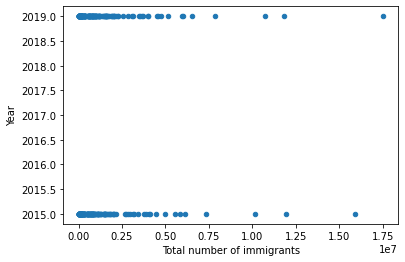

In [86]:
test.plot(kind='scatter',
            x= 'Total number of immigrants',
            y= 'Year')

In [87]:
gp_test=country_dep_df.merge(globpeace_2015_2019, left_on = ['Country of departure'], right_on = ['Country'])

In [88]:
globpeace_2015_2019

,Country,2015 rank,2019 rank
0,Iceland,1,1
1,New Zealand,3,2
2,Portugal,12,3
3,Austria,4,4
4,Denmark,2,5
...,...,...,...
158,Yemen,160,159
159,Syria,148,160
160,South Sudan,161,161
161,Iraq,162,162


In [89]:
gp_test.corr()

,Year,Total number of immigrants
Year,1.00000,0.02641
Total number of immigrants,0.02641,1.00000


<AxesSubplot:xlabel='Total number of immigrants', ylabel='Year'>

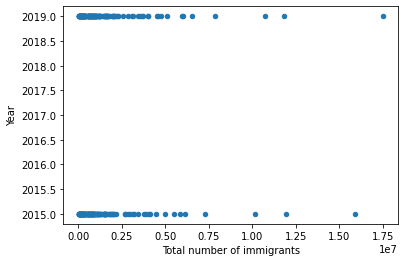

In [90]:
gp_test.plot(kind='scatter',
            x= 'Total number of immigrants',
            y= 'Year')

In [91]:
mk_glob=mass_killing_sra.merge(globpeace_2015_2019, left_on = ['risk_in_2021_22country'], right_on = ['Country'])

In [92]:
mk_glob.corr()

,riskrank,1 in X chance,anymk.ongoing,anymk.ever,imr.sqrt,gdppcgrowth.combined,battledeaths.ln,religiousfreedom,battledeaths,percent_chance_of_mass_killing,imr_per_1000
riskrank,1.000000,0.909971,-0.423147,-0.592880,-0.668721,-0.115685,-0.629333,0.447144,-0.238703,-0.726055,-0.608920
1 in X chance,0.909971,1.000000,-0.276886,-0.514126,-0.615387,-0.016426,-0.441349,0.379369,-0.155772,-0.505798,-0.538143
anymk.ongoing,-0.423147,-0.276886,1.000000,0.361993,0.341747,0.060968,0.569445,-0.342591,0.364859,0.635017,0.355075
anymk.ever,-0.592880,-0.514126,0.361993,1.000000,0.308628,0.037516,0.372059,-0.212168,0.169128,0.443831,0.282246
imr.sqrt,-0.668721,-0.615387,0.341747,0.308628,1.000000,0.246102,0.411433,-0.160685,0.161602,0.489296,0.978165
gdppcgrowth.combined,-0.115685,-0.016426,0.060968,0.037516,0.246102,1.000000,0.066243,-0.075079,0.032405,0.104164,0.245423
battledeaths.ln,-0.629333,-0.441349,0.569445,0.372059,0.411433,0.066243,1.000000,-0.370286,0.509283,0.703238,0.407996
religiousfreedom,0.447144,0.379369,-0.342591,-0.212168,-0.160685,-0.075079,-0.370286,1.000000,-0.208055,-0.430478,-0.117908
battledeaths,-0.238703,-0.155772,0.364859,0.169128,0.161602,0.032405,0.509283,-0.208055,1.000000,0.399250,0.152743
percent_chance_of_mass_killing,-0.726055,-0.505798,0.635017,0.443831,0.489296,0.104164,0.703238,-0.430478,0.399250,1.000000,0.483345


<AxesSubplot:xlabel='battledeaths', ylabel='imr_per_1000'>

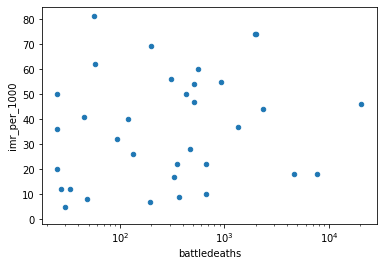

In [93]:
mk_glob.plot(kind='scatter',
            x= 'battledeaths',
            y= 'imr_per_1000', logx = True)

<AxesSubplot:xlabel='religiousfreedom', ylabel='riskrank'>

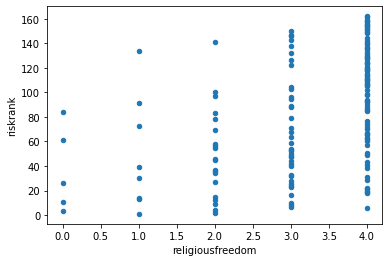

In [94]:
mk_glob.plot(kind='scatter',
            x= 'religiousfreedom',
            y= 'riskrank')

<AxesSubplot:xlabel='percent_chance_of_mass_killing', ylabel='riskrank'>

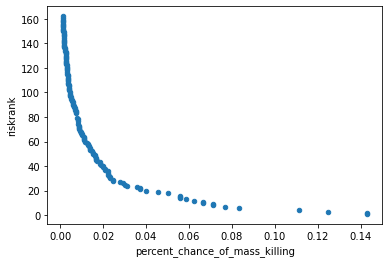

In [95]:
mk_glob.plot(kind='scatter',
            x= 'percent_chance_of_mass_killing',
            y= 'riskrank')

In [96]:
c_origin_unemp=unemp_rate.merge(country_by_dest, left_on = ['Entity', 'Year'], right_on = ['Country of departure', 'Year'])

In [97]:
c_origin_unemp

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Major country, area of destination",Country of departure,Total number of immigrants
0,Afghanistan,AFG,2015,11.39,Namibia,Afghanistan,42.0
1,Afghanistan,AFG,2015,11.39,South Africa,Afghanistan,145.0
2,Afghanistan,AFG,2015,11.39,Guinea,Afghanistan,3.0
3,Afghanistan,AFG,2015,11.39,Mali,Afghanistan,480.0
4,Afghanistan,AFG,2015,11.39,Egypt,Afghanistan,146.0
...,...,...,...,...,...,...,...
19161,Zimbabwe,ZWE,2019,5.02,France,Zimbabwe,771.0
19162,Zimbabwe,ZWE,2019,5.02,Netherlands,Zimbabwe,1537.0
19163,Zimbabwe,ZWE,2019,5.02,Switzerland,Zimbabwe,1032.0
19164,Zimbabwe,ZWE,2019,5.02,Canada,Zimbabwe,11176.0


In [98]:
c_origin_unemp.corr()

,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Total number of immigrants
Year,1.000000,-0.097192,0.005079
"Unemployment, total (% of total labor force) (modeled ILO estimate)",-0.097192,1.000000,-0.014575
Total number of immigrants,0.005079,-0.014575,1.000000


<AxesSubplot:xlabel='Total number of immigrants', ylabel='Unemployment, total (% of total labor force) (modeled ILO estimate)'>

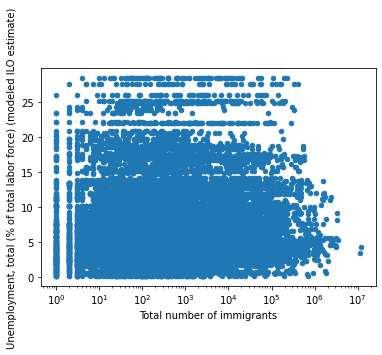

In [99]:
c_origin_unemp.plot(kind='scatter',
            x= 'Total number of immigrants',
            y= 'Unemployment, total (% of total labor force) (modeled ILO estimate)', logx= True)

In [100]:
I=img_stk_2yrs.merge(country_dep_df, left_on = ['Major country, area of destination'], right_on = ['Country of departure'])

In [101]:
I.corr()

,Sort order,M/F img_stk 2015,M/F img_stk 2019,M img_stk 2015,M img_stk 2019,F img_stk 2015,F img_stk 2019,Year,Total number of immigrants
Sort order,1.000000e+00,1.587899e-01,1.589647e-01,1.378905e-01,1.378632e-01,1.775696e-01,1.777594e-01,-1.162380e-16,-0.002685
M/F img_stk 2015,1.587899e-01,1.000000e+00,9.977832e-01,9.934682e-01,9.867278e-01,9.935016e-01,9.939513e-01,1.066610e-16,0.250218
M/F img_stk 2019,1.589647e-01,9.977832e-01,1.000000e+00,9.940405e-01,9.925588e-01,9.885317e-01,9.925086e-01,3.328773e-17,0.246440
M img_stk 2015,1.378905e-01,9.934682e-01,9.940405e-01,1.000000e+00,9.968044e-01,9.740246e-01,9.763989e-01,-5.747158e-17,0.240712
M img_stk 2019,1.378632e-01,9.867278e-01,9.925588e-01,9.968044e-01,1.000000e+00,9.638361e-01,9.702465e-01,-1.525508e-16,0.236648
F img_stk 2015,1.775696e-01,9.935016e-01,9.885317e-01,9.740246e-01,9.638361e-01,1.000000e+00,9.985241e-01,2.557585e-16,0.256445
F img_stk 2019,1.777594e-01,9.939513e-01,9.925086e-01,9.763989e-01,9.702465e-01,9.985241e-01,1.000000e+00,2.275256e-16,0.252580
Year,-1.162380e-16,1.066610e-16,3.328773e-17,-5.747158e-17,-1.525508e-16,2.557585e-16,2.275256e-16,1.000000e+00,0.023964
Total number of immigrants,-2.685349e-03,2.502183e-01,2.464403e-01,2.407116e-01,2.366475e-01,2.564446e-01,2.525798e-01,2.396385e-02,1.000000


In [102]:
img_stk_2yrs

,Sort order,"Major country, area of destination",M/F img_stk 2015,M/F img_stk 2019,M img_stk 2015,M img_stk 2019,F img_stk 2015,F img_stk 2019
0,24,Burundi,289810.0,321018.0,142790,158163.0,147020.0,162855
1,25,Comoros,12555.0,12504.0,6071,6047.0,6484.0,6457
2,26,Djibouti,112351.0,115341.0,59081,60654.0,53270.0,54687
3,27,Eritrea,15941.0,16101.0,8833,8922.0,7108.0,7179
4,28,Ethiopia,1161642.0,1253083.0,591409,637963.0,570233.0,615120
...,...,...,...,...,...,...,...,...
255,279,Bermuda,19126.0,19336.0,9336,9439.0,9790.0,9897
256,280,Canada,7428657.0,7960657.0,3533164,3786190.0,3895493.0,4174467
257,281,Greenland,5797.0,5690.0,3812,3742.0,1985.0,1948
258,282,Saint Pierre and Miquelon,986.0,990.0,516,519.0,470.0,471


C:\Users\ksobi\AppData\Local\Temp\TableauTemp\1661843747\Data\created CSVs

In [103]:
merged_pop_dest=country_by_dest.merge(country_pop)

In [104]:
merged_pop_dest['Immigrants per 100000']=(merged_pop_dest['Total number of immigrants']/merged_pop_dest['M/F pop 2019'])*100000

In [112]:
pop_2019=country_pop[['Major country, area of destination', 'M/F pop 2019']]

In [116]:
pop_2019=pop_2019.rename(columns={'Major country, area of destination': 'Country'})

In [117]:
pop_2019

,Country,M/F pop 2019
0,Burundi,11530580.0
1,Comoros,850886.0
2,Djibouti,973560.0
3,Eritrea,3497117.0
4,Ethiopia,112078730.0
...,...,...
255,Bermuda,62506.0
256,Canada,37411047.0
257,Greenland,56672.0
258,Saint Pierre and Miquelon,5822.0


In [124]:
country_dep_df=country_dep_df.rename(columns={'Country of departure': 'Country'})

In [118]:
country_pop

,Sort order,"Major country, area of destination",M/F pop 2015,M/F pop 2019,M pop 2015,M pop 2019,F pop 2015,F pop 2019
0,24,Burundi,10160030.0,11530580.0,5030735.0,5718988.0,5129299.0,5811589.0
1,25,Comoros,777424.0,850886.0,392089.0,429210.0,385346.0,421681.0
2,26,Djibouti,913993.0,973560.0,483117.0,511947.0,430881.0,461610.0
3,27,Eritrea,3342818.0,3497117.0,1674330.0,1752711.0,1668488.0,1744406.0
4,28,Ethiopia,100835458.0,112078730.0,50408589.0,56069008.0,50426864.0,56009719.0
...,...,...,...,...,...,...,...,...
255,279,Bermuda,63692.0,62506.0,.................................................,.................................................,.................................................,.................................................
256,280,Canada,36026676.0,37411047.0,17864138.0,18563538.0,18162530.0,18847500.0
257,281,Greenland,56377.0,56672.0,.................................................,.................................................,.................................................,.................................................
258,282,Saint Pierre and Miquelon,5993.0,5822.0,.................................................,.................................................,.................................................,.................................................


In [133]:
country_dep_df

,Year,Country,Total number of immigrants
0,2015,Afghanistan,4977199.0
1,2015,Albania,1129100.0
2,2015,Algeria,1838908.0
3,2015,American Samoa,1967.0
4,2015,Andorra,8723.0
...,...,...,...
459,2019,Wallis and Futuna Islands,11820.0
460,2019,Western Sahara,195572.0
461,2019,Yemen,1248711.0
462,2019,Zambia,317444.0


In [126]:
country_pop_merge=pd.merge(country_dep_df, pop_2019)

In [127]:
country_pop_merge.loc

,Year,Country,Total number of immigrants,M/F pop 2019
0,2015,Afghanistan,4977199.0,38041754.0
1,2019,Afghanistan,5120959.0,38041754.0
2,2015,Albania,1129100.0,2880917.0
3,2019,Albania,1207092.0,2880917.0
4,2015,Algeria,1838908.0,43053054.0
...,...,...,...,...
459,2019,Yemen,1248711.0,29161922.0
460,2015,Zambia,261849.0,17861030.0
461,2019,Zambia,317444.0,17861030.0
462,2015,Zimbabwe,844419.0,14645468.0


In [106]:
merged_pop_dest.to_csv('../Data/merged_pop_dest.csv')

In [107]:
merged_pop_dest['Country of departure'].value_counts()

United States of America       324
United Kingdom                 292
China                          286
France                         276
India                          260
                              ... 
Isle of Man                     12
Channel Islands                 10
Holy See                        10
Falkland Islands (Malvinas)     10
Mayotte                          6
Name: Country of departure, Length: 232, dtype: int64

In [128]:
yr_19=country_pop_merge.loc[country_pop_merge['Year'] == 2019]

In [130]:
yr_19

,Year,Country,Total number of immigrants,M/F pop 2019
1,2019,Afghanistan,5120959.0,38041754.0
3,2019,Albania,1207092.0,2880917.0
5,2019,Algeria,1945035.0,43053054.0
7,2019,American Samoa,1817.0,55312.0
9,2019,Andorra,9114.0,77142.0
...,...,...,...,...
455,2019,Wallis and Futuna Islands,11820.0,11432.0
457,2019,Western Sahara,195572.0,582463.0
459,2019,Yemen,1248711.0,29161922.0
461,2019,Zambia,317444.0,17861030.0


In [132]:
yr_19['Immigrants per 100000']=(yr_19['M/F pop 2019'])/ yr_19['Total number of immigrants']
yr_19

C:\Users\ksobi\AppData\Local\Temp/ipykernel_23204/1782123396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_19['Immigrants per 100000']=(yr_19['M/F pop 2019'])*10000 / yr_19['Total number of immigrants']


,Year,Country,Total number of immigrants,M/F pop 2019,Immigrants per 100000
1,2019,Afghanistan,5120959.0,38041754.0,74286.386593
3,2019,Albania,1207092.0,2880917.0,23866.590119
5,2019,Algeria,1945035.0,43053054.0,221348.479590
7,2019,American Samoa,1817.0,55312.0,304413.869015
9,2019,Andorra,9114.0,77142.0,84641.211323
...,...,...,...,...,...
455,2019,Wallis and Futuna Islands,11820.0,11432.0,9671.742809
457,2019,Western Sahara,195572.0,582463.0,29782.535332
459,2019,Yemen,1248711.0,29161922.0,233536.198528
461,2019,Zambia,317444.0,17861030.0,562651.365280
